# 4.7 Deriving New Variables

### This script contains the following points:
#### 1. Import resources
#### 2. Create 2 new columns 'price_range' and 'busiest_day'
#### 3. Create an updated categorization for 'busiest_day'
#### 4. Create a new column 'busiest_period_of_day.'

### 1. Import resources

In [1]:
# Import libs
import pandas as pd
import numpy as np
import os

In [2]:
# Set a path variable for the import
path = r'C:\Users\zhoux\Documents\CF-Data Analyst Program\DA-Immersion\10-2023 Instacart Basket Analysis'

In [3]:
df_op_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

### 2. Create 2 new columns 'price_range' and 'busiest_day'

##### Create “price_range”

In [4]:
df_op_merged.loc[df_op_merged['prices'] > 15, 'price_range'] = 'High range product'

In [5]:
df_op_merged.loc[(df_op_merged['prices'] <= 15) & (df_op_merged['prices'] > 5), 'price_range'] = 'Mid-range product'

In [6]:
df_op_merged.loc[df_op_merged['prices'] <= 5, 'price_range'] = 'Low-range product'

In [7]:
df_op_merged['price_range'].value_counts()

price_range
Mid-range product     21860860
Low-range product     10126321
High range product      417678
Name: count, dtype: int64

##### Create “busiest_day”

In [8]:
# look at order distribution on the 7 days of a week
df_op_merged['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [9]:
# Create an empty list to store the category values "Busiest day,” “Least busy,” and “Regularly busy"
result = []

In [10]:
# Run a for-loop for all values in the dataframe
for value in df_op_merged['orders_day_of_week']:
    if value == 0:
        result.append('Busiest day')
    elif value == 4:
        result.append('Least busiest day')
    else:
        result.append('Regularly busy')

In [35]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busiest day',
 'Least busiest day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busiest day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busiest day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busiest day',
 'Least busiest day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busiest day',
 'Regularl

In [11]:
# Create a new column to store the variable result
df_op_merged['busiest_day'] = result

In [12]:
# Check the correctness of this summary column for the busiest day of the week
df_op_merged['busiest_day'].value_counts(dropna = False)

busiest_day
Regularly busy       22416875
Busiest day           6204182
Least busiest day     3783802
Name: count, dtype: int64

In [14]:
df_op_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busiest day
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busiest day


### 3. Create an updated categorization for 'busiest_day'

The client has changed their mind. They want “Busiest day” to become “Busiest days” (plural). This label should correspond with the two busiest days of the week as opposed to the single busiest day. At the same time, they’d also like to know the two slowest days.

In [15]:
# Define an empty list and fill it with the assigned values from the for-loop
result_busiest_days = []

for v in df_op_merged['orders_day_of_week']:
    if v == 0 or v == 1:
        result_busiest_days.append('Busiest days')
    elif v == 3 or v == 4:
        result_busiest_days.append('Least busiest days')
    else: 
        result_busiest_days.append('Regularly busy')  

In [65]:
result_busiest_days

['Regularly busy',
 'Least busiest days',
 'Least busiest days',
 'Least busiest days',
 'Least busiest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Least busiest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Least busiest days',
 'Least busiest days',
 'Least busiest days',
 'Least busiest days',
 'Least busiest days',
 'Least busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busiest days',
 'Regularly busy',
 'Least busiest days',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Least busiest days',
 'Least busiest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Least busiest days',
 

In [16]:
df_op_merged['busiest_days'] = result_busiest_days

In [17]:
df_op_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busiest day,Least busiest days
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busiest day,Least busiest days


##### Check the values of this new column for accuracy

In [69]:
# Check the values for accuracy
df_op_merged['busiest_days'].value_counts()

busiest_days
Regularly busy        12916111
Busiest days          11864412
Least busiest days     7624336
Name: count, dtype: int64

In [70]:
# Show the values from the old version
df_op_merged['busiest_day'].value_counts()

busiest_day
Regularly busy       22416875
Busiest day           6204182
Least busiest day     3783802
Name: count, dtype: int64

The change in the results are expected: with an additional 'busiest day' and 'least busiest day', it is expected that the counts of both value will drastically increase, while the counts of 'regularly busy" gets significantly reduced. The plus and minus in these counts match together, so we know the results are correct.

### 4. Create  a new column 'busiest_period_of_day.'

When too many users make Instacart orders at the same time, the app freezes. The senior technical officer wants to identify the busiest hours of the day. Rather than by hour, they want periods of time labeled “Most orders,” “Average orders,” and “Fewest orders.” Create a new column containing these labels called “busiest_period_of_day.”

In [71]:
# Gain an overview of the hour distribution in all orders
df_op_merged['order_hour_of_day'].value_counts()

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

To determine the interval, we need to make a graph to gain direct understanding of how the values are scattered. 

In [82]:
# Create a subset df_hours, out of the value_counts() above
df_hours = df_op_merged['order_hour_of_day'].value_counts().rename_axis('order_hour_of_day').reset_index(name='counts')
df_hours

,order_hour_of_day,counts
0,10,2761760
1,11,2736140
2,14,2689136
3,15,2662144
4,13,2660954
5,12,2618532
6,16,2535202
7,9,2454203
8,17,2087654
9,8,1718118


<Axes: xlabel='order_hour_of_day', ylabel='counts'>

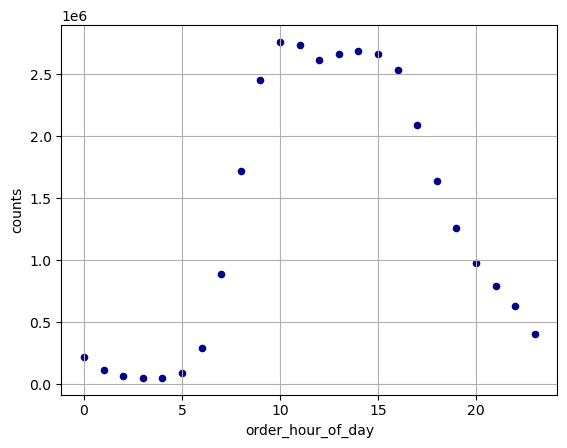

In [86]:
# Create a scatter plot with grid lines
df_hours.plot.scatter(x = 'order_hour_of_day', y = 'counts', c = 'DarkBlue', grid = True)

From the scatter plot, it is easy to see that the highest counts (busiest hours) are equal to 2.5 (million) and above; the lowest counts (least busiest hours) are below 0.5 (million); everything in between can be categorized as regularly busy.
However, as there is an observation (order_hour_of_day = 9) that is very close to 2.5 (million), I would also include this observation in the busiest hours. The company is going to grow, thus the count of orders happening at 9am could soon surpass 2.5 (million). It makes more sense to already count 9am as one of the busiest hours now.

Therefore, the categorizations are: 1) Most orders: 9,10,11,12,13,14,15,16; 2) Average order: 7,8,17,18,19,20,21,22; 3) Fewest orders: 0,1,2,3,4,5,6.

In [94]:
# Use loc() to assign one of the three string values to the new column 'busiest_period_of_day'
df_op_merged.loc[df_op_merged['order_hour_of_day'].isin([9,10,11,12,13,14,15,16]), 'busiest_period_of_day'] = 'Most orders'

In [89]:
df_op_merged.loc[df_op_merged['order_hour_of_day'].isin([7,8,17,18,19,20,21,22]), 'busiest_period_of_day'] = 'Average orders'

In [90]:
df_op_merged.loc[df_op_merged['order_hour_of_day'].isin([0,1,2,3,4,5,6]), 'busiest_period_of_day'] = 'Fewest orders'

In [91]:
# Gain a quick look at the new column
df_op_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Average orders
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Most orders
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busiest day,Least busiest days,Average orders
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busiest day,Least busiest days,Most orders


##### Print the frequency for this new column

In [93]:
# Print the frequency of this column
df_op_merged['busiest_period_of_day'].value_counts()

busiest_period_of_day
Most orders       21118071
Average orders     9997651
Fewest orders       886821
Name: count, dtype: int64

##### Export as .pkl 

In [96]:
df_op_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_new_cols.pkl'))